## I) Import Packages and Data preparation

In [8]:
path='/content/drive/MyDrive/Projet Non-Alternants AED 2021/'
data_r = pd.read_csv(path+'DATA/challengeSIDM2-movies.min30.withtext.csv')
data_f = pd.read_csv(path+'LIVRAISON_PROJET_AED/DATA/df_vecteurs_Images.csv')


In [9]:
features=['sharpnessframe0','sharpnessframe1','sharpnessframe2','contrastframe0','contrastframe1','contrastframe2'
,'saturationframe0','saturationframe1','saturationframe2','brightnessframe0','brightnessframe1','brightnessframe2']

In [10]:
df2=data_f[['id','sharpnessframe0','sharpnessframe1','sharpnessframe2','contrastframe0','contrastframe1','contrastframe2'
,'saturationframe0','saturationframe1','saturationframe2','brightnessframe0','brightnessframe1','brightnessframe2']]
df2.drop_duplicates(subset ="id",keep= 'first' ,inplace=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df1= data_r[['movieId','rating']]
df_merged = df1.merge(df2, left_on='movieId', right_on='id')
data_final = df_merged.drop(['id'], axis=1)
print(data_final.shape)
data_final.head()

(6120, 14)


,movieId,rating,sharpnessframe0,sharpnessframe1,sharpnessframe2,contrastframe0,contrastframe1,contrastframe2,saturationframe0,saturationframe1,saturationframe2,brightnessframe0,brightnessframe1,brightnessframe2
0,1,3.921240,56.989267,57.419495,2.825876,55.251245,54.635186,1.937253,93.108507,93.878275,69.344077,61.553944,41.419639,8.618135
1,2,3.211977,27.549034,61.561568,39.309454,26.055686,60.243742,34.964463,31.197741,15.579384,30.050402,67.994002,20.313466,71.506458
2,3,3.151040,45.660917,27.937122,43.669681,36.209625,26.544125,37.663629,12.033902,50.690629,32.012695,12.450667,48.503366,12.743542
3,6,3.834930,17.401041,36.600134,46.272327,15.165764,29.532811,38.100462,72.412267,119.856926,163.119902,14.818607,24.342973,37.341466
4,7,3.366484,45.919389,47.662478,40.118052,39.741625,45.824033,31.229192,58.128477,80.982509,144.692005,41.415493,49.766192,33.193327


Text(0.5, -0.15, 'Matrice de corrélation')

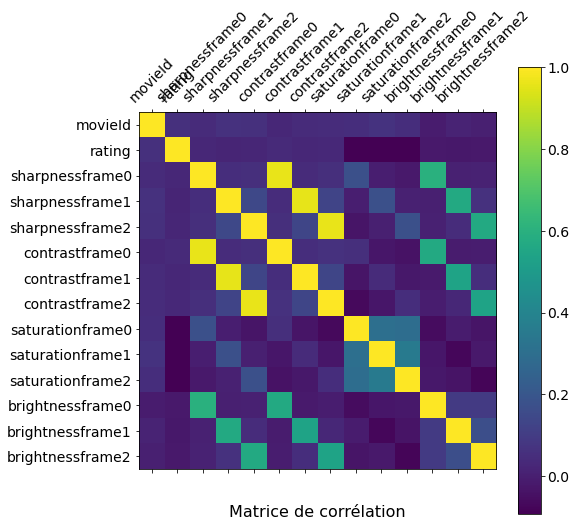

In [12]:
f = plt.figure(figsize=(8, 8))

plt.matshow(data_final.corr(), fignum=f.number) #df.corr() permet de calculer les corrélations une à une de vos variables
plt.xticks(range(data_final.shape[1]), data_final.columns, fontsize=14, rotation=45)
plt.yticks(range(data_final.shape[1]), data_final.columns, fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de corrélation', fontsize=16, y=-0.15)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsfrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## II) modeling

In [15]:
#!pip install catboost
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_final[features], data_final['rating'], test_size=0.33, random_state=42)

### 1 Linear Regression

In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#Mean Squared Error: 0.2469883742362877

Mean Squared Error: 0.2469883742362877


### 2. Random Forest

In [ ]:
model = RandomForestRegressor()
param_grid = {'n_estimators':[10,20,30],
            'max_features': ["auto", "sqrt", "log2"],
            'min_samples_split': [2,4,8],
            'bootstrap': [True, False],
            }

grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)
grid.fit(X_train,y_train)

#print the best parameters from all possible combinations
print("best parameters are: ", grid.best_params_)
print("best score is: ", grid.best_score_)
# best parameters are:  {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 30}
# best score is:  -0.2598831595650618

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.3min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


best parameters are:  {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
best score is:  -0.25628729506996045


In [28]:
rf_model = RandomForestRegressor(bootstrap= True, max_features='sqrt', min_samples_split= 8, n_estimators= 30)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#Mean Squared Error: 0.2516556865838122

Mean Squared Error: 0.24925246491110145


### 3 Xgboost

In [ ]:
model = XGBRegressor()
param_grid = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.5,0.7],
              'n_estimators': [50,100,200]}
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)
grid.fit(X_train,y_train)
#print the best parameters from all possible combinations
print("best parameters are: ", grid.best_params_)
print("best score is: ", grid.best_score_)
# best parameters are:  {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
# best score is:  -0.2531168105810001

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  3.5min finished


best parameters are:  {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 100, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.5}
best score is:  -0.2507716021054941


In [39]:
xgb_model = XGBRegressor(learning_rate= 0.05, max_depth= 6, min_child_weight= 3, n_estimators= 90, nthread=4, objective= 'reg:linear', silent= 1,subsample= 0.5)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# 0.250372589201216

Mean Squared Error: 0.250372589201216


### 4 LGBM

In [ ]:
model = LGBMRegressor()
param_grid = {    
    'num_leaves': [7, 14, 21, 28],
    'learning_rate': [0.1, 0.01, 0.05, 0.001],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 300],
}
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)
grid.fit(X_train,y_train)
#print the best parameters from all possible combinations
print("best parameters are: ", grid.best_params_)
print("best score is: ", grid.best_score_)
# best parameters are:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 7}
# best score is:  0.24822155477183488

In [37]:
lgbm_model= LGBMRegressor(learning_rate= 0.01, max_depth=5, n_estimators= 200, num_leaves= 7)
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#    0.244

Mean Squared Error: 0.2449469536274471


### 5 SVR

In [ ]:
model=SVR(kernel='rbf')
param_grid={'C': [1.1, 5.4, 170, 1001],
            'epsilon': [0.0003, 0.001, 0.02, 0.05, 0.1, 1, 3, 7],
            'gamma': [0.001, 0.005, 0.1,  0.01, 1, 3,5]}
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)
grid.fit(X_train,y_train)

# print the best parameters from all possible combinations
print("best parameters are: ", grid.best_params_)
print("best parameters are: ", grid.best_params_)
## best parameters are:  {'C': 170, 'epsilon': 0.001, 'gamma': 0.01}

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed: 12.0min finished


best parameters are:  {'C': 170, 'epsilon': 0.001, 'gamma': 0.01}
best parameters are:  {'C': 170, 'epsilon': 0.001, 'gamma': 0.01}


In [35]:
svr_model=SVR(kernel='rbf',C= 170, epsilon= 0.001, gamma= 0.01)
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
## 0.25

Mean Squared Error: 0.2547222292412707


### 6 Gradient Boosting

In [ ]:
model=GradientBoostingRegressor()
parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth":[3,5,8],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.8, 0.9,1.0],
    "n_estimators":[10,50,100,200]
    }

grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)
grid.fit(X_train,y_train)

#print the best parameters from all possible combinations
print("best parameters are: ", grid.best_params_)
print("best score is: ", grid.best_score_)

In [33]:
GBR_model = GradientBoostingRegressor(learning_rate =0.01, max_depth=7, n_estimators=300, subsample=0.5) 
GBR_model.fit(X_train, y_train)
y_pred = GBR_model.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#  0.246

Mean Squared Error: 0.2462920589516415


### 6 Catboosting

In [27]:
cat_model = CatBoostRegressor(logging_level='Silent',learning_rate =0.01, depth=6, random_state=45, iterations=400) 
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
## 0.25

Mean Squared Error: 0.24312844002077064


## III) Features importance

In [23]:
# Fonction pour affichier l'importance des features pour un tel model.
def plot_feature_importance(importance,names,model_type):
  feature_importance = np.array(importance)
  feature_names = np.array(names)
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  plt.figure(figsize=(10,8))
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

### 1) Important features for CatBoost Regressor.

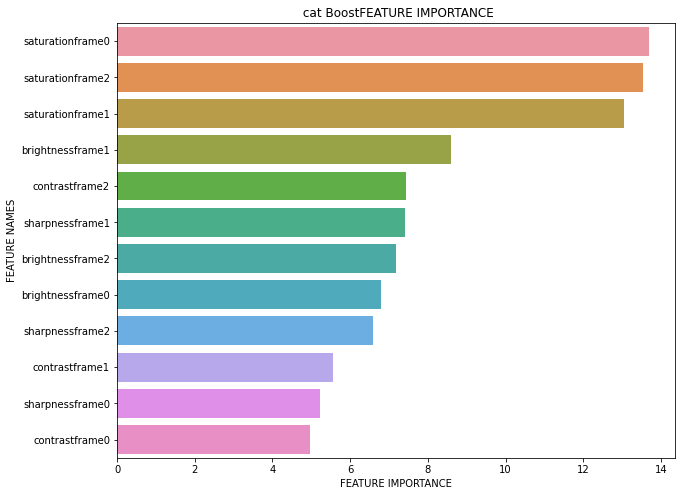

In [25]:
plot_feature_importance(cat_model.get_feature_importance(),data_final[features].columns,'Cat Boost ')

### 2) Important features for Random Forest Regressor.

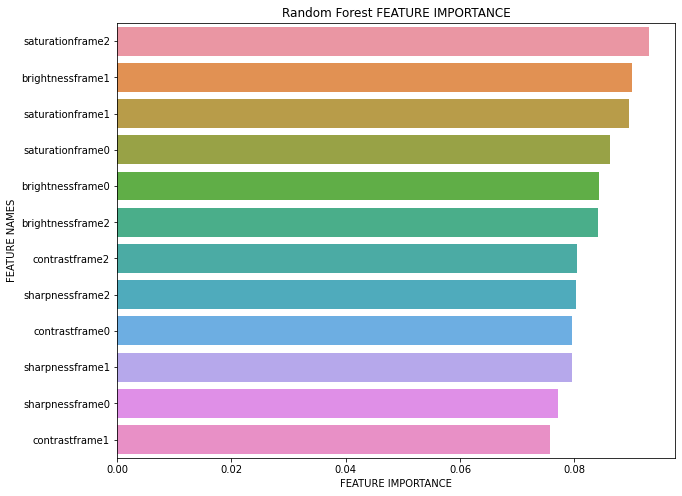

In [30]:
plot_feature_importance(rf_model.feature_importances_,data_final[features].columns,'Random Forest ')

### 3) Important features for Random LightGBM Regressor.

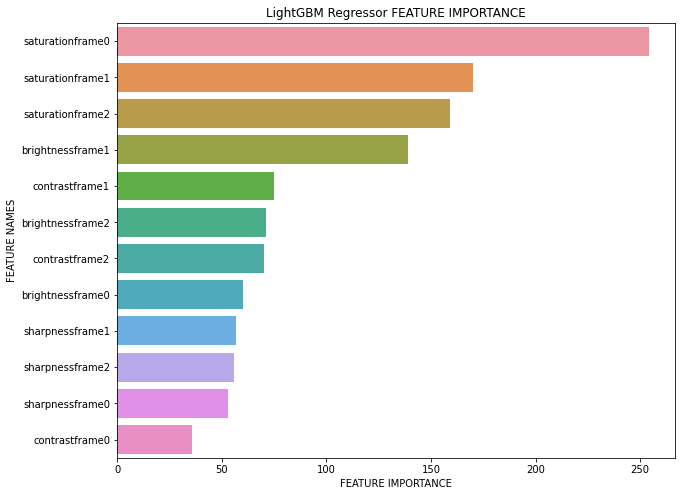

In [38]:
plot_feature_importance(lgbm_model.feature_importances_,data_final[features].columns,'LightGBM Regressor ')

### 4) Important features for XGBoost Regressor.

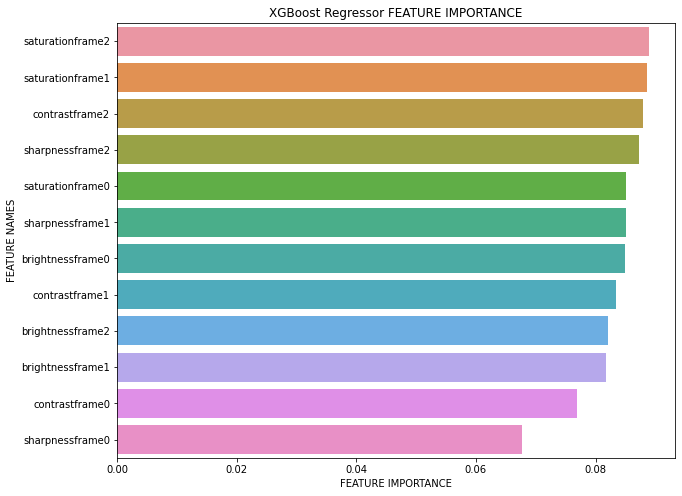

In [40]:
plot_feature_importance(xgb_model.feature_importances_,data_final[features].columns,'XGBoost Regressor ')

### 5) Important features for Gradient Boosting Regressor.

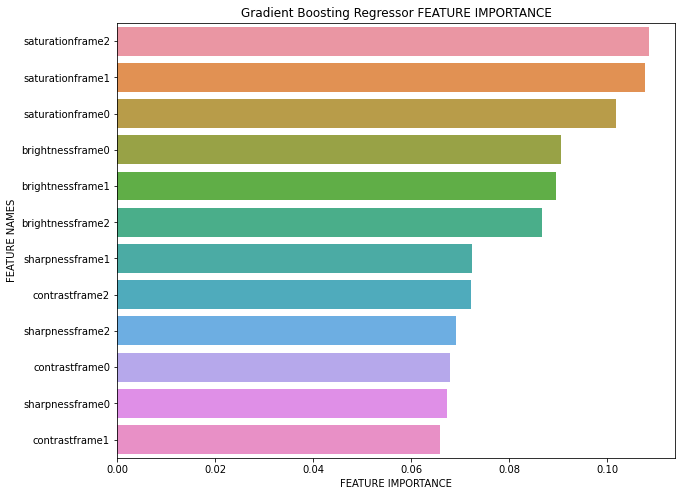

In [34]:
plot_feature_importance(GBR_model.feature_importances_,data_final[features].columns,'Gradient Boosting Regressor ')